In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
RANDOM_STATE = 42
from datetime import date

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
###Products

In [3]:
df_products = pd.read_csv('definitivo_10000clientes.csv')

In [4]:
df_products.head().T

,0,1,2,3,4
pk_cid,"1,517,456.00","1,512,063.00","1,515,010.00","1,520,203.00","1,518,210.00"
recency,161.00,178.00,169.00,148.00,157.00
frequency,6.00,6.00,6.00,6.00,6.00
monetary_value,910.00,900.00,900.00,840.00,810.00
r_quartile,1.00,1.00,1.00,1.00,1.00
f_quartile,4.00,4.00,4.00,4.00,4.00
m_quartile,1.00,1.00,1.00,1.00,1.00
RFMScore,141.00,141.00,141.00,141.00,141.00
region_code,28.00,8.00,28.00,8.00,28.00
salary,"113,652.32","113,652.32","113,652.32","113,652.32","113,652.32"


In [5]:
df_products.describe()

,pk_cid,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
count,"9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00","9,972.00"
mean,"1,421,345.72",290.72,10.03,658.08,2.65,2.35,1.00,289.92,26.33,"112,985.76",40.59,1.56,2.18,0.68,0.57
std,"172,756.87",155.05,5.00,447.78,1.49,1.49,0.00,134.29,12.83,"80,879.70",12.33,0.50,0.75,0.38,0.34
min,"17,980.00",6.00,1.00,120.00,1.00,1.00,1.00,141.00,1.00,"12,048.51",19.55,0.00,0.33,0.00,0.00
25%,"1,385,321.75",136.00,5.00,240.00,1.00,1.00,1.00,141.00,15.00,"91,533.26",32.00,1.00,1.73,0.33,0.33
50%,"1,402,174.00",331.00,11.00,670.00,4.00,1.00,1.00,411.00,28.00,"113,652.32",38.00,2.00,1.93,0.93,0.67
75%,"1,522,590.50",442.00,15.00,920.00,4.00,4.00,1.00,411.00,35.00,"113,652.32",47.00,2.00,2.55,1.00,0.85
max,"1,552,055.00",511.00,17.00,"4,290.00",4.00,4.00,1.00,411.00,52.00,"3,045,715.68",101.24,2.00,7.47,1.00,1.00


In [6]:
df_products['salary'].fillna(value='nada', inplace=True)

In [7]:
df_products = df_products[df_products['salary'] != 'nada']

C:\Users\evive\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
df_products['region_code'].fillna(value='nada', inplace=True)

In [9]:
df_products = df_products[df_products['region_code'] != 'nada']

In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pk_cid                   9972 non-null   int64  
 1   recency                  9972 non-null   int64  
 2   frequency                9972 non-null   int64  
 3   monetary_value           9972 non-null   float64
 4   r_quartile               9972 non-null   int64  
 5   f_quartile               9972 non-null   int64  
 6   m_quartile               9972 non-null   int64  
 7   RFMScore                 9972 non-null   int64  
 8   region_code              9972 non-null   float64
 9   salary                   9972 non-null   float64
 10  age                      9972 non-null   float64
 11  gender                   9972 non-null   float64
 12  unidades_vendidas_total  9972 non-null   float64
 13  em_acount                9972 non-null   float64
 14  debit_card              

In [11]:
df_products['salary'] = df_products['salary'].astype(int)

In [12]:
df_products['region_code'] = df_products['region_code'].astype(int)

In [13]:
df_products['age'].describe()

count   9,972.00
mean       40.59
std        12.33
min        19.55
25%        32.00
50%        38.00
75%        47.00
max       101.24
Name: age, dtype: float64

In [14]:
reduce_df_products = ['region_code', 'salary', 'age']

In [15]:
reduce_df = df_products[reduce_df_products]

In [16]:
reduce_df.head(5).T

,0,1,2,3,4
region_code,28.00,8.00,28.00,8.00,28.00
salary,"113,652.00","113,652.00","113,652.00","113,652.00","113,652.00"
age,37.00,32.83,31.00,34.50,65.00


In [17]:
reduce_df.describe()

,region_code,salary,age
count,"9,972.00","9,972.00","9,972.00"
mean,26.33,"112,985.36",40.59
std,12.84,"80,879.70",12.33
min,1.00,"12,048.00",19.55
25%,15.00,"91,532.75",32.00
50%,28.00,"113,652.00",38.00
75%,35.00,"113,652.00",47.00
max,52.00,"3,045,715.00",101.24


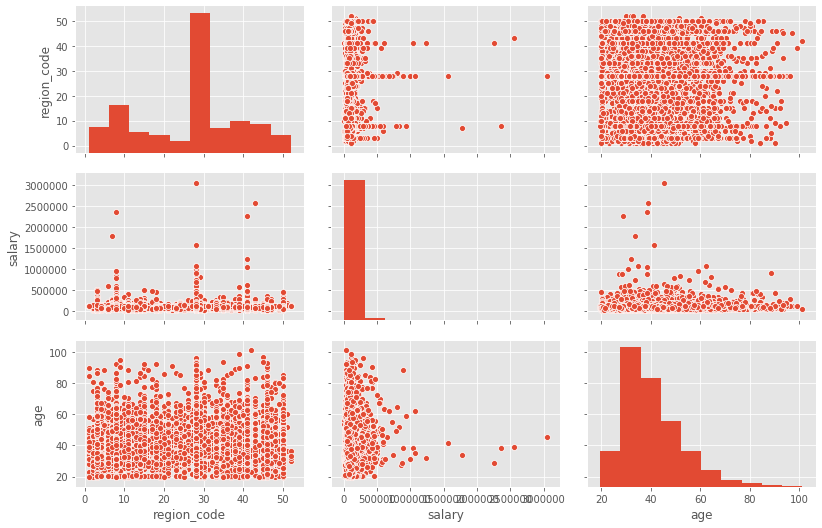

In [18]:
sns.pairplot(reduce_df, aspect=1.5)

In [19]:
reduce_df['region'] = pd.qcut(reduce_df['region_code'], q=4, labels=range(4))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
reduce_df['salario'] = pd.qcut(reduce_df['salary'], q=2, labels=range(2))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
reduce_df['edad'] = pd.qcut(reduce_df['age'], q=5, labels=range(5))

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
reduce_df.head(5).T

,0,1,2,3,4
region_code,28,8,28,8,28
salary,113652,113652,113652,113652,113652
age,37.00,32.83,31.00,34.50,65.00
region,1,0,1,0,1
salario,0,0,0,0,0
edad,2,1,1,1,4


In [23]:
reduce_df.pivot_table(index='salario', values=['region_code'], aggfunc=[len, np.median])


,len,median
,region_code,region_code
salario,,
0,8440,28
1,1532,28


In [24]:
reduce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9971
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   region_code  9972 non-null   int32   
 1   salary       9972 non-null   int32   
 2   age          9972 non-null   float64 
 3   region       9972 non-null   category
 4   salario      9972 non-null   category
 5   edad         9972 non-null   category
dtypes: category(3), float64(1), int32(2)
memory usage: 583.3 KB


In [25]:
cruce_table = pd.crosstab(reduce_df['edad'], reduce_df['salario'])


In [26]:
cruce_table

salario,0,1
edad,,
0,1684,314
1,1740,253
2,1806,274
3,1617,289
4,1593,402


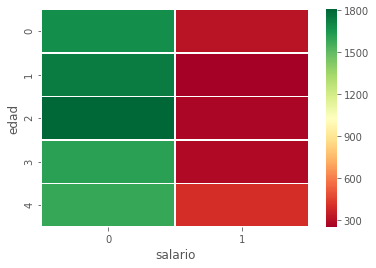

In [27]:
sns.heatmap(cruce_table, cmap='RdYlGn', linewidths=0.5)


In [28]:
pipe = Pipeline(
        steps=[
            ('StandardScaler', StandardScaler()),
            ('KMeans', KMeans(n_clusters=8))
        ]
)

In [29]:
pipe.fit(reduce_df[['salary', 'region_code', 'age']])

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [30]:
Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)


Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [31]:
pipe

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('KMeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [32]:
reduce_df['Cluster'] = pipe.predict(reduce_df[['salary', 'region_code', 'age']])


C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
reduce_df['Cluster']

0       0
1       3
2       0
3       3
4       7
       ..
9967    0
9968    0
9969    6
9970    6
9971    0
Name: Cluster, Length: 9972, dtype: int32

In [34]:
reduce_df.groupby('Cluster').agg({
    'salary': 'mean',
    'region_code': 'median',
    'age': 'mean'
})

,salary,region_code,age
Cluster,,,
0,"110,070.61",28,32.44
1,"98,362.30",45,35.41
2,"2,261,346.50",28,37.80
3,"101,534.22",8,33.74
4,"458,679.63",28,44.47
5,"106,857.68",8,51.36
6,"109,633.35",28,50.03
7,"116,492.51",28,71.56


In [35]:
from scipy.stats import scoreatpercentile

from statsmodels.compat.pandas import Substitution
from statsmodels.sandbox.nonparametric import kernels

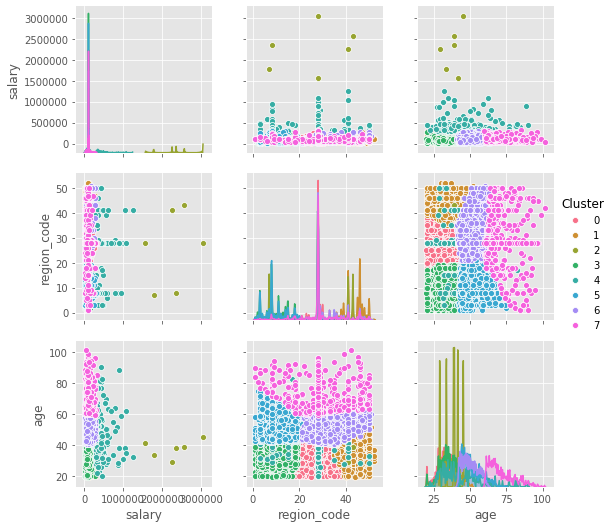

In [36]:

sns.pairplot(reduce_df, vars=['salary', 'region_code', 'age'], hue='Cluster', diag_kws={'bw': 0.2})
plt.show()

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

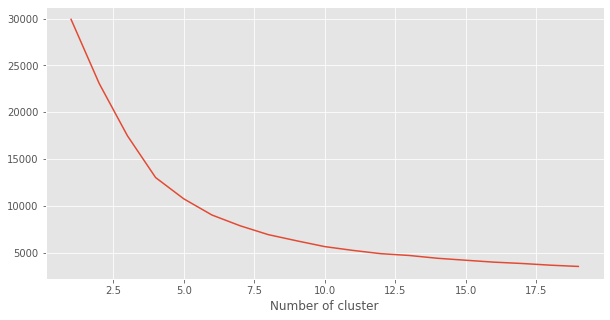

In [37]:
sse = {}
for k in range(1, 20):
    pipe = Pipeline(
            steps=[
                ('StandardScaler', StandardScaler()),
                ('KMeans', KMeans(n_clusters=k))
            ]
        ).fit(reduce_df[['salary', 'region_code', 'age']])
    reduce_df['Cluster'] = pipe['KMeans'].labels_
    sse[k] = pipe['KMeans'].inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [38]:
from sklearn.cluster import DBSCAN

In [39]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = reduce_df[['salary', 'region_code', 'age']]

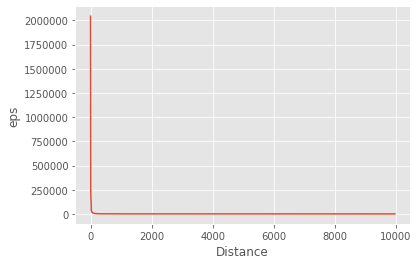

In [40]:
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [41]:
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_

In [42]:
results

array([ 0, -1,  1, ..., -1, -1, -1], dtype=int64)

C:\Users\evive\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


-1      8009
 64       49
 31       43
 1        41
 39       41
 6        41
 43       38
 62       37
 0        34
 10       33
 24       32
 105      31
 8        26
 74       25
 7        24
 83       23
 30       22
 75       20
 16       19
 129      18
 115      18
 194      18
 103      16
 137      16
 4        14
 5        14
 94       13
 197      12
 150      12
 86       12
 63       12
 34       11
 71       11
 49       11
 90       11
 201      10
 3        10
 54       10
 138       9
 149       9
 134       9
 22        9
 214       9
 231       9
 193       9
 175       9
 106       9
 165       9
 46        9
 209       9
 2         8
 68        8
 116       8
 69        8
 97        8
 217       8
 163       8
 44        8
 57        8
 65        8
 81        8
 89        8
 13        8
 176       8
 206       8
 82        8
 88        8
 111       8
 166       8
 72        8
 237       7
 73        7
 50        7
 37        7
 96        7
 87        7
 132       7

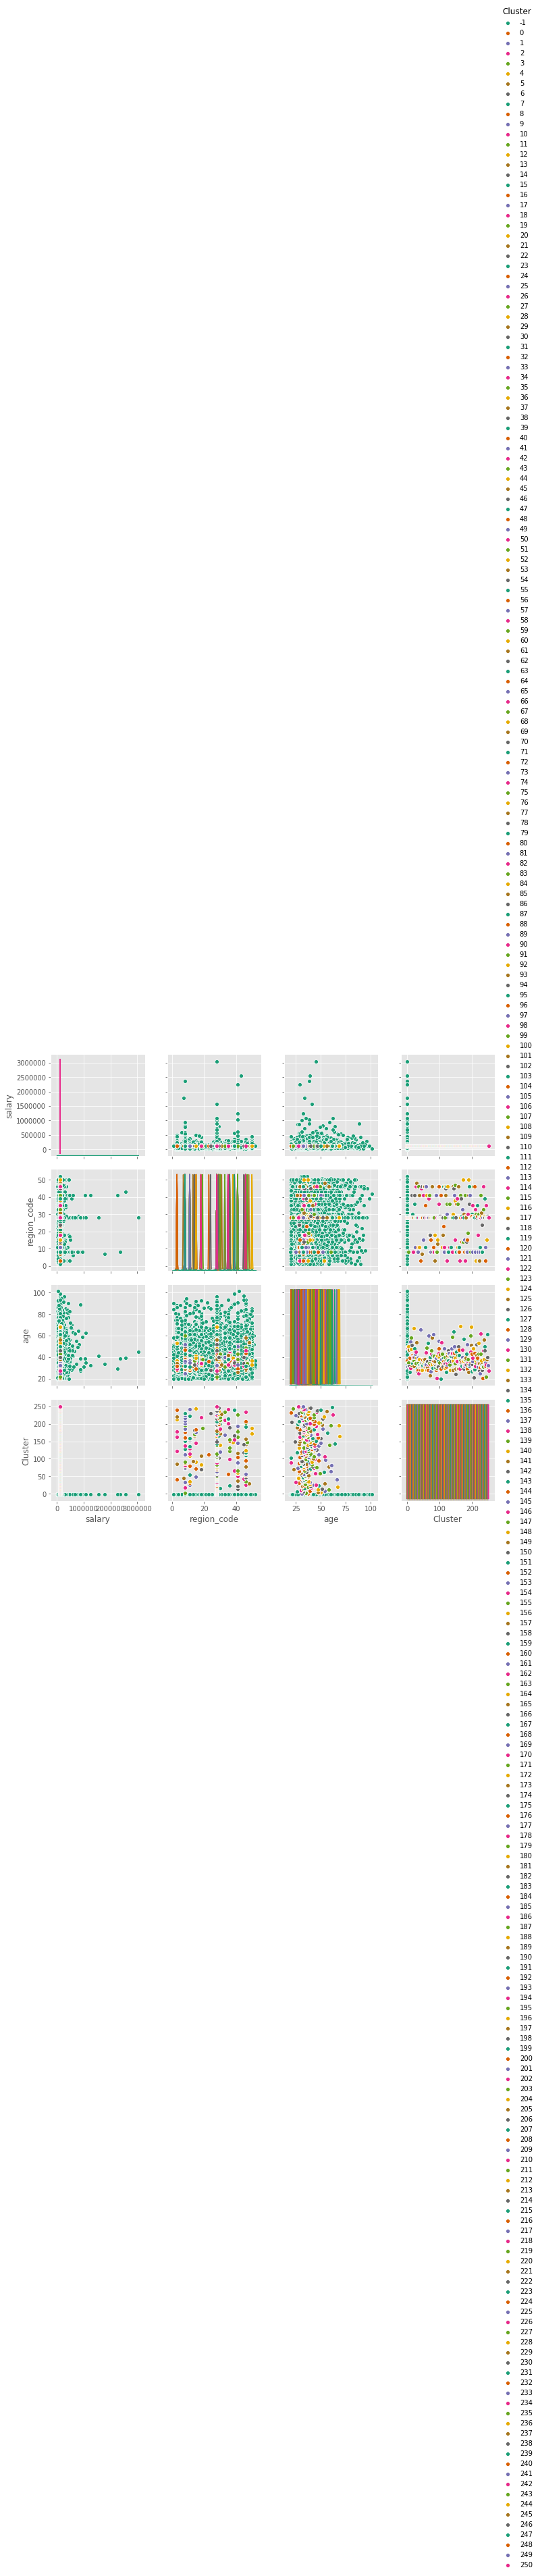

In [43]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster'] = dbs_1.fit(Data_DBSCAN).labels_
print (df_DBSCAN['Cluster'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster',palette='Dark2',diag_kws={'bw': 0.2})

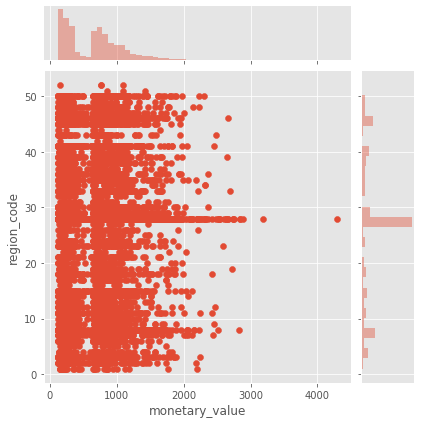

In [44]:

sns.jointplot(data=df_products, x="monetary_value", y="region_code")


In [45]:
df2 = df_products[['region_code', 'salary', 'age', 'monetary_value', 'unidades_vendidas_total']]

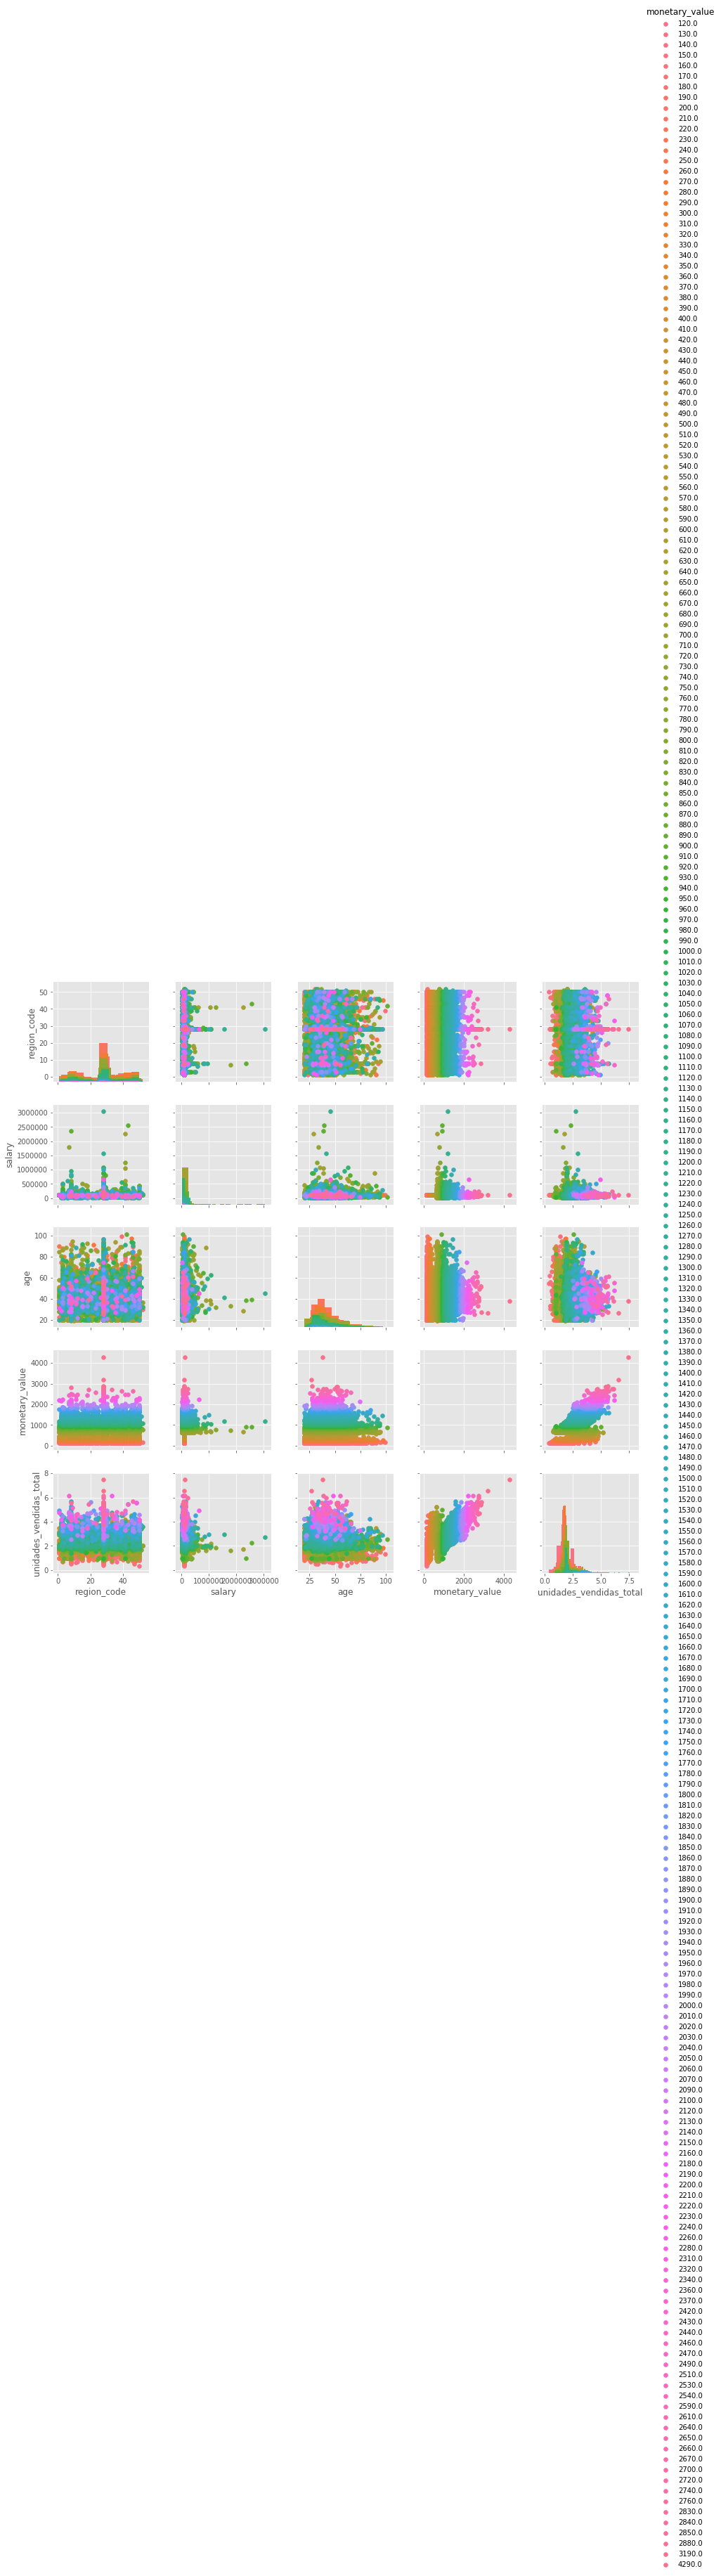

In [47]:
# PairGrid object with hue 
graph = sns.PairGrid(df2, hue ='monetary_value') 
# type of graph for diagonal 
graph = graph.map_diag(plt.hist) 
# type of graph for non-diagonal 
graph = graph.map_offdiag(plt.scatter) 
# to add legends 
graph = graph.add_legend() 
# to show 
plt.show() 

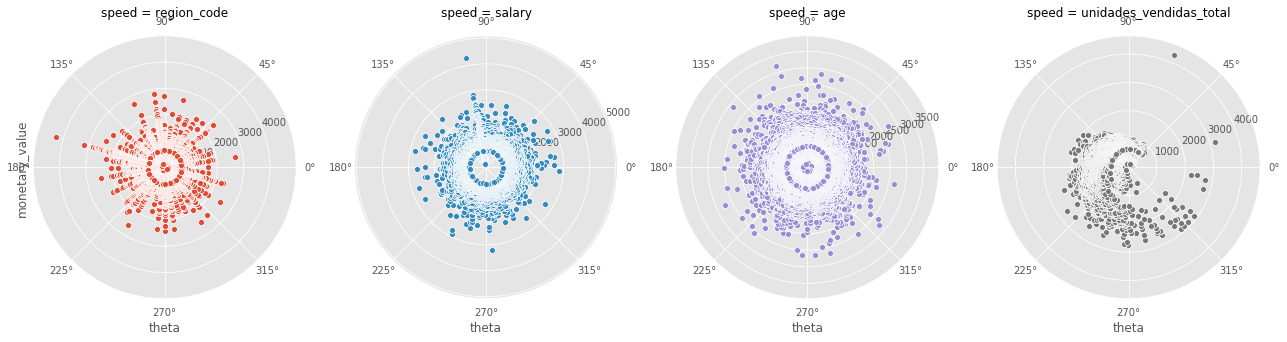

In [48]:

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'monetary_value': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df2, id_vars=['monetary_value'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "monetary_value")

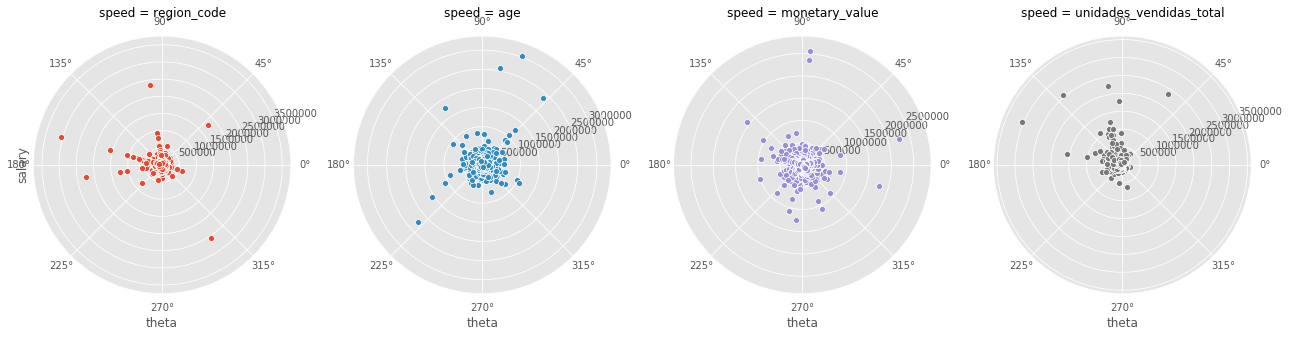

In [49]:

# Generate an example radial datast
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'salary': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})

# Convert the dataframe to long-form or "tidy" format
df = pd.melt(df2, id_vars=['salary'], var_name='speed', value_name='theta')

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "theta", "salary")